In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import scipy.stats as sp

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
% matplotlib inline

In [3]:
sns.set(style='white')

In [4]:
source_dir = Path('..') / '..' / 'derivatives' / '0.4.joined'

In [5]:
data = pd.read_csv( source_dir / 'all_subject_level.csv' )
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['SciField'] = data['SciField'] - 1
data['Gender'] = data['Gender'] - 1
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data.head()

,sub,Condition,Age,Gender,Major,Major_TEXT,SciDegree,SciDegree_TEXT,EduYears,SciEdu_HS,...,SciLit_sum,SciTudeA_sum,SciTudeL_sum,SciTudeS_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,1.0,5.0,biomedical-science,NaN,NaN,14,4,...,4.0,25,21,24,9.0,14.0,17.0,9.0,12.0,13.0
1,102,Video,19.0,1.0,5.0,forensic-science,NaN,NaN,12,3,...,2.0,21,22,26,17.0,19.0,14.0,11.0,11.0,9.0
2,103,Original,18.0,0.0,2.0,communications,NaN,NaN,12,3,...,2.0,27,13,21,16.0,13.0,16.0,10.0,11.0,16.0
3,104,Annotated,18.0,0.0,5.0,statistics,NaN,NaN,12,4,...,2.0,30,20,27,17.0,13.0,20.0,14.0,15.0,13.0
4,105,Video,18.0,0.0,5.0,biomedical-science,NaN,NaN,12,6,...,4.0,21,13,28,17.0,13.0,12.0,12.0,10.0,13.0


# Demographics

In [6]:
df = data.groupby(['AgeGroup','Condition']).agg({
    'sub':'count', 'Age':'mean', 'Gender':'mean', 'SciField':'mean',
    'comp_change':'mean', 'comp_t1':'mean', 'comp_t2':'mean'
})
df

sub        Age    Gender  SciField  comp_change  \
AgeGroup Condition                                                    
OA       Annotated   16  71.384615  0.687500  0.687500     2.000000   
         Original    16  76.153846  0.687500  0.625000     3.750000   
         Video       20  74.105263  0.631579  0.650000     3.550000   
YA       Annotated   25  18.400000  0.680000  0.360000     2.760000   
         Original    27  18.884615  0.518519  0.296296     4.148148   
         Video       23  19.043478  0.652174  0.173913     3.826087   

                      comp_t1    comp_t2  
AgeGroup Condition                        
OA       Annotated  12.062500  14.062500  
         Original   11.000000  14.750000  
         Video      10.650000  14.200000  
YA       Annotated  10.560000  13.320000  
         Original    9.592593  13.740741  
         Video       9.782609  13.608696

# Group comparisons

In [7]:
vars_of_interest = ['comp_t1', 'comp_t2', 'comp_change', 'nb_CoR', 'nb_RT', 'procspd_RT',
                    'NFCS_sum','TSSI_sum', 'vocab_sum','SciLit_sum',
                    'SciTudeA_sum','SciTudeL_sum','SciTudeS_sum']

In [8]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations
We need to drop all missing data listwise. SPSS does this pairwise for the correlations, but I'm not sure how exactly to replicate that. If we find a way to, I would prefer not to destroy data unnecessarily here.

In [9]:
slim_data = data[['sub','AgeGroup','Condition']+vars_of_interest].dropna()

## Correlation Matrices

Define functions to create the correlation & significance tables and matrices

In [10]:
def corr_table(df):
    corr_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            corr_df.loc[c,d] = sp.pearsonr(df[c],df[d])[0]
    return(corr_df)

def sig_table(df):
    sig_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            sig_df.loc[c,d] = sp.pearsonr(df[c],df[d])[1]
    return(sig_df)

In [11]:
def matrix_mask(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(16,5))
    return(mask)

In [12]:
def correlation_matrix(df,title):
    mask = matrix_mask(df)
    fig = sns.heatmap(df, mask=mask, annot=True, cmap='Spectral',
                      fmt='.3f', linewidths=1, center=0)
    fig.set_title(title+'\nCorrelation Coefficients')
    return(fig)

def significance_matrix(df,title):
    mask = matrix_mask(df)
    myColors = (
        (0.4, 0.0, 0.0, 1.00),(0.6, 0.0, 0.0, 0.85),(0.8, 0.0, 0.0, 0.70),(1.0, 0.0, 0.0, 0.55),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
    )
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    fig = sns.heatmap(df, mask=mask, annot=True, cmap=cmap,
                fmt='.3f', linewidths=1, center=0.5
               )
    fig.set_title(title+'\nCorrelation Significance')
    return(fig)

### All AgeGroups,Conditions

In [13]:
corr_df = corr_table(slim_data)
sig_df = sig_table(slim_data)

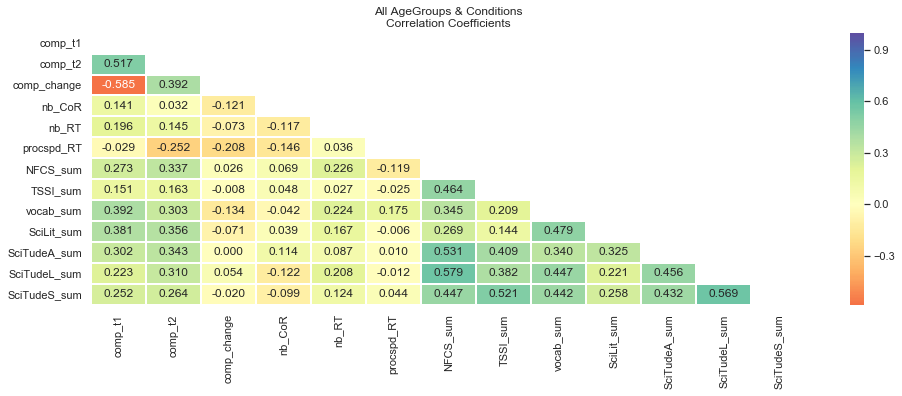

In [14]:
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'allgroups_correlations.png'
fig = correlation_matrix(corr_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath, bbox_inches='tight')

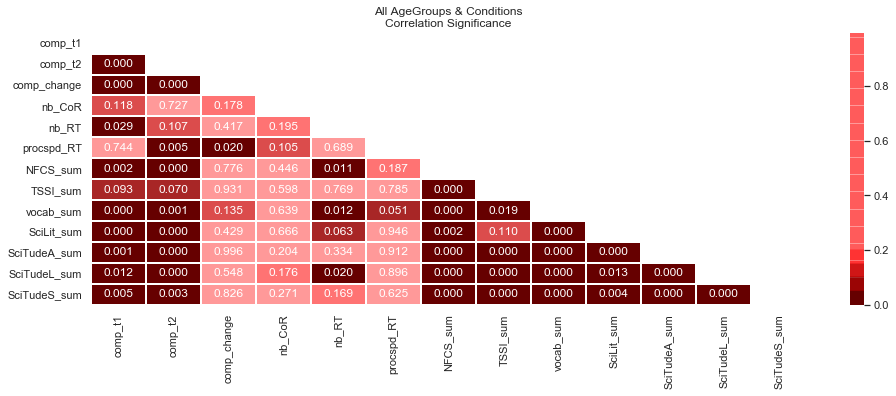

In [15]:
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'allgroups_significance.png'
fig = significance_matrix(sig_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath, bbox_inches='tight')

### By AgeGroup

In [16]:
ya_data = slim_data[slim_data['AgeGroup'] == 'YA']
oa_data = slim_data[slim_data['AgeGroup'] == 'OA']

In [17]:
ya_corr_df = corr_table(ya_data)
ya_sig_df = sig_table(ya_data)
oa_corr_df = corr_table(oa_data)
oa_sig_df = sig_table(oa_data)

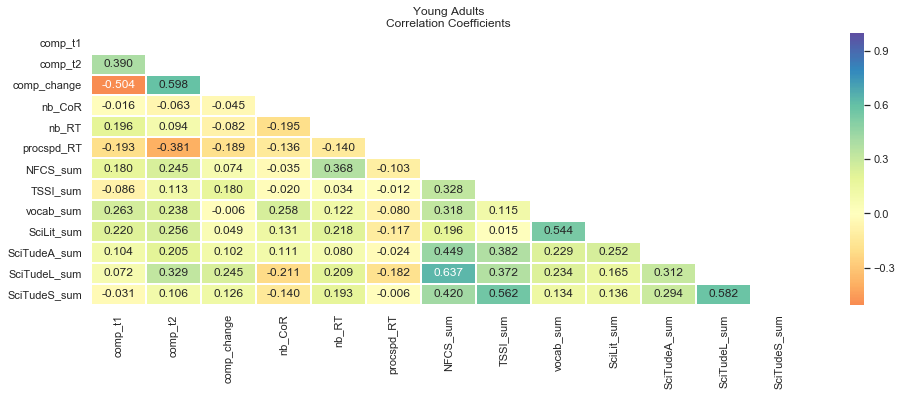

In [18]:
fig = correlation_matrix(ya_corr_df,'Young Adults')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'ya_correlations.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

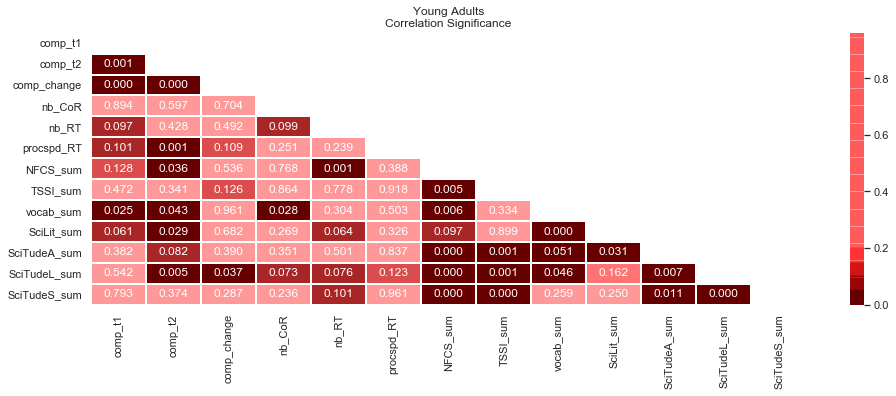

In [19]:
fig = significance_matrix(ya_sig_df,'Young Adults')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'ya_significance.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

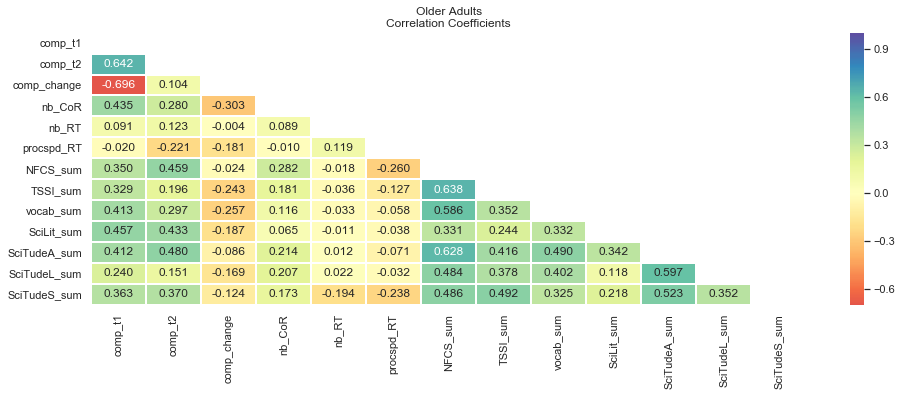

In [20]:
fig = correlation_matrix(oa_corr_df,'Older Adults')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'oa_correlations.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

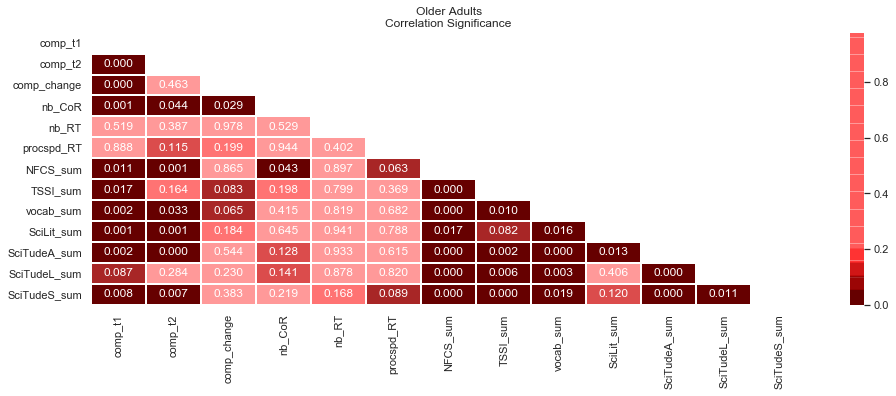

In [21]:
fig = significance_matrix(oa_sig_df,'Older Adults')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'oa_significance.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

### By Condition

In [22]:
annotated_data = slim_data[slim_data['Condition'] == 'Annotated']
original_data = slim_data[slim_data['Condition'] == 'Original']
video_data = slim_data[slim_data['Condition'] == 'Video']

In [23]:
annotated_corr_df = corr_table(annotated_data)
annotated_sig_df = sig_table(annotated_data)

original_corr_df = corr_table(original_data)
original_sig_df = sig_table(original_data)

video_corr_df = corr_table(video_data)
video_sig_df = sig_table(video_data)

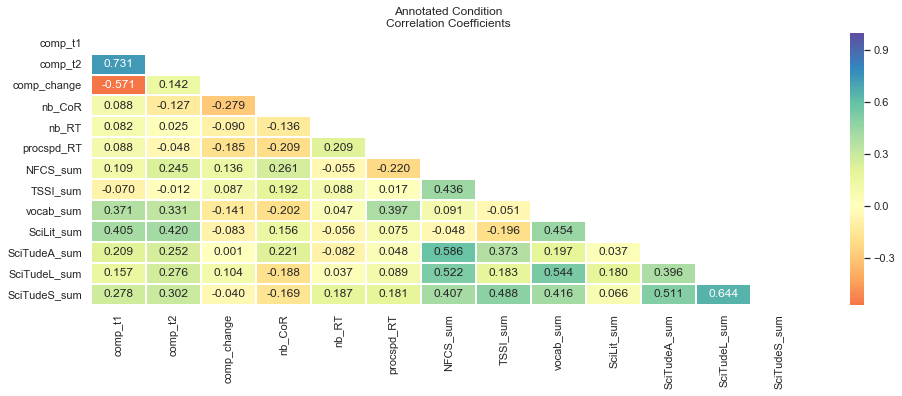

In [24]:
fig = correlation_matrix(annotated_corr_df,'Annotated Condition')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'annot_correlations.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

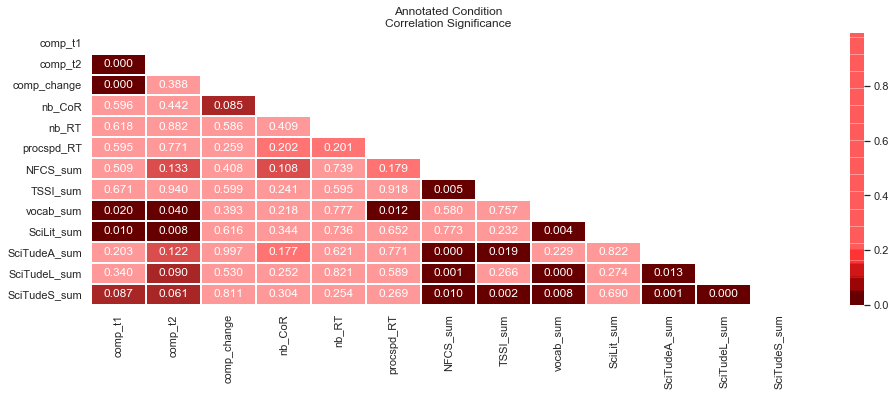

In [25]:
fig = significance_matrix(annotated_sig_df,'Annotated Condition')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'annot_significance.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

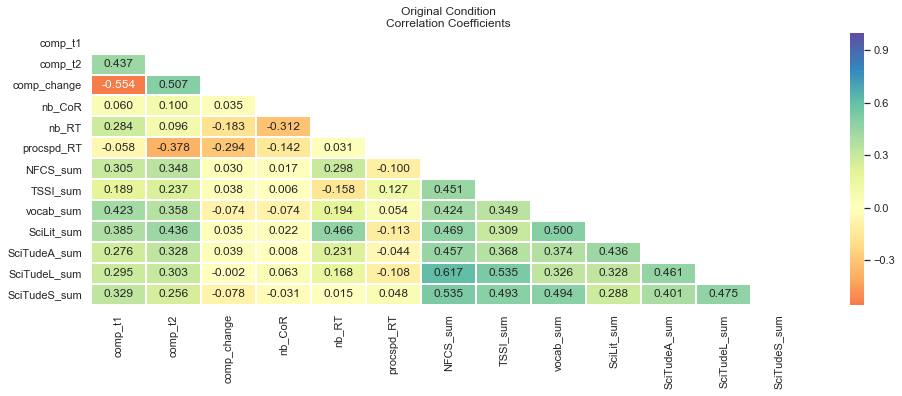

In [27]:
fig = correlation_matrix(original_corr_df,'Original Condition')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'orig_correlations.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

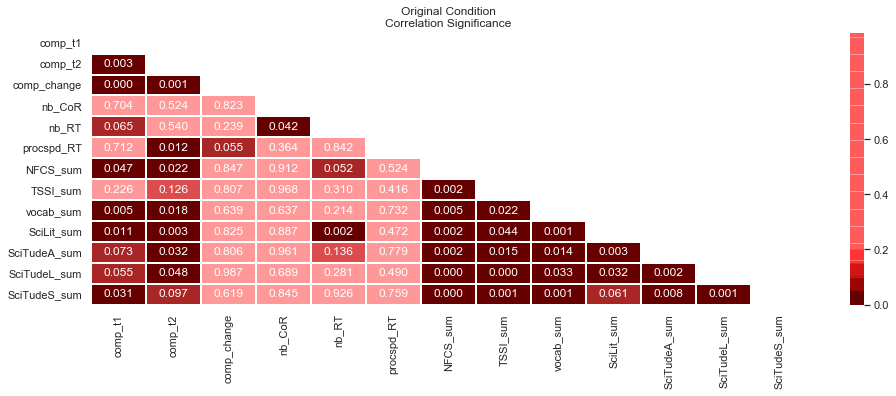

In [28]:
fig = significance_matrix(original_sig_df,'Original Condition')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'orig_significance.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

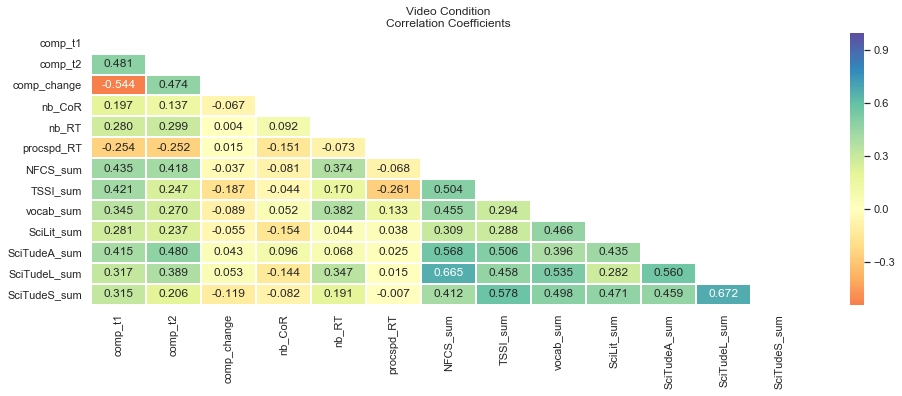

In [29]:
fig = correlation_matrix(video_corr_df,'Video Condition')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'video_correlations.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

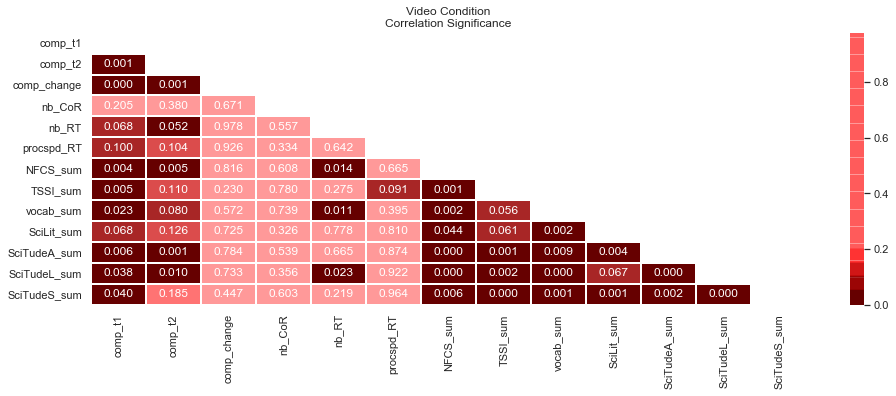

In [30]:
fig = significance_matrix(video_sig_df,'Video Condition')
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'video_significance.png'
fig.get_figure().savefig(fpath, bbox_inches='tight')

## Correlograms

<Figure size 1152x360 with 0 Axes>

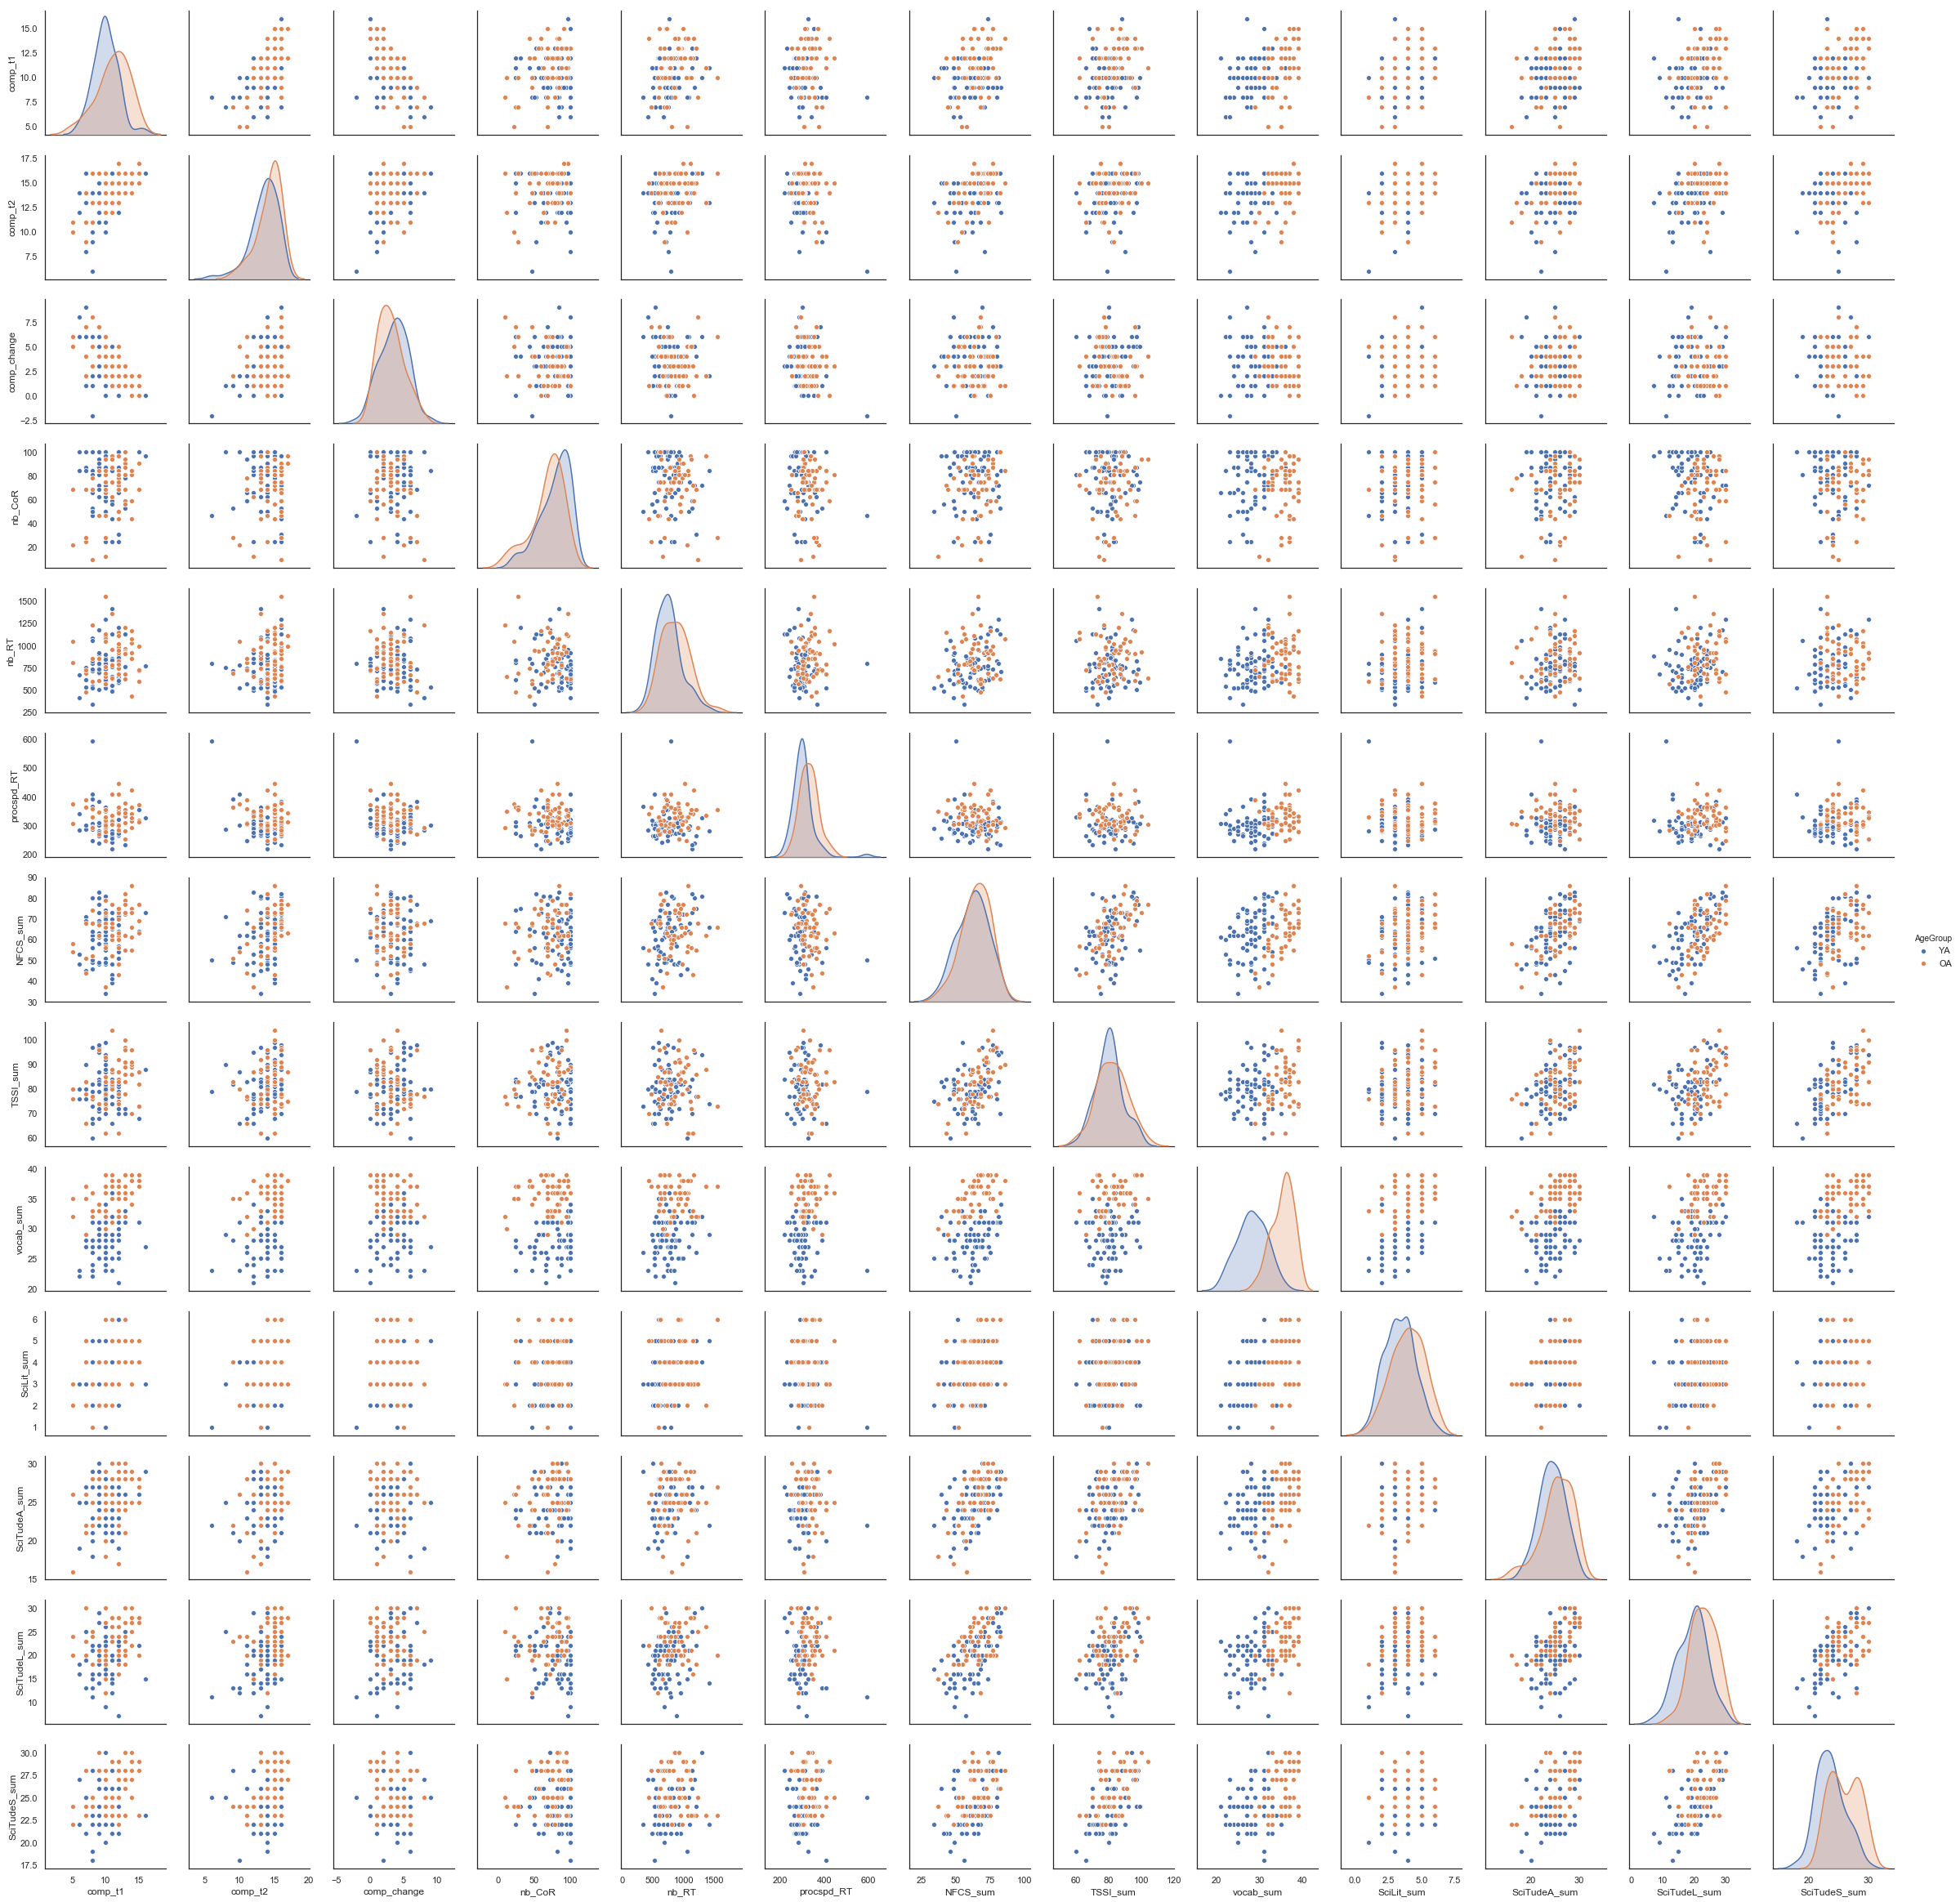

In [31]:
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'AgeGroup_correlogram.png'
plt.figure(figsize=(16,5))
df = slim_data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='AgeGroup')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath, bbox_inches='tight')

<Figure size 1152x360 with 0 Axes>

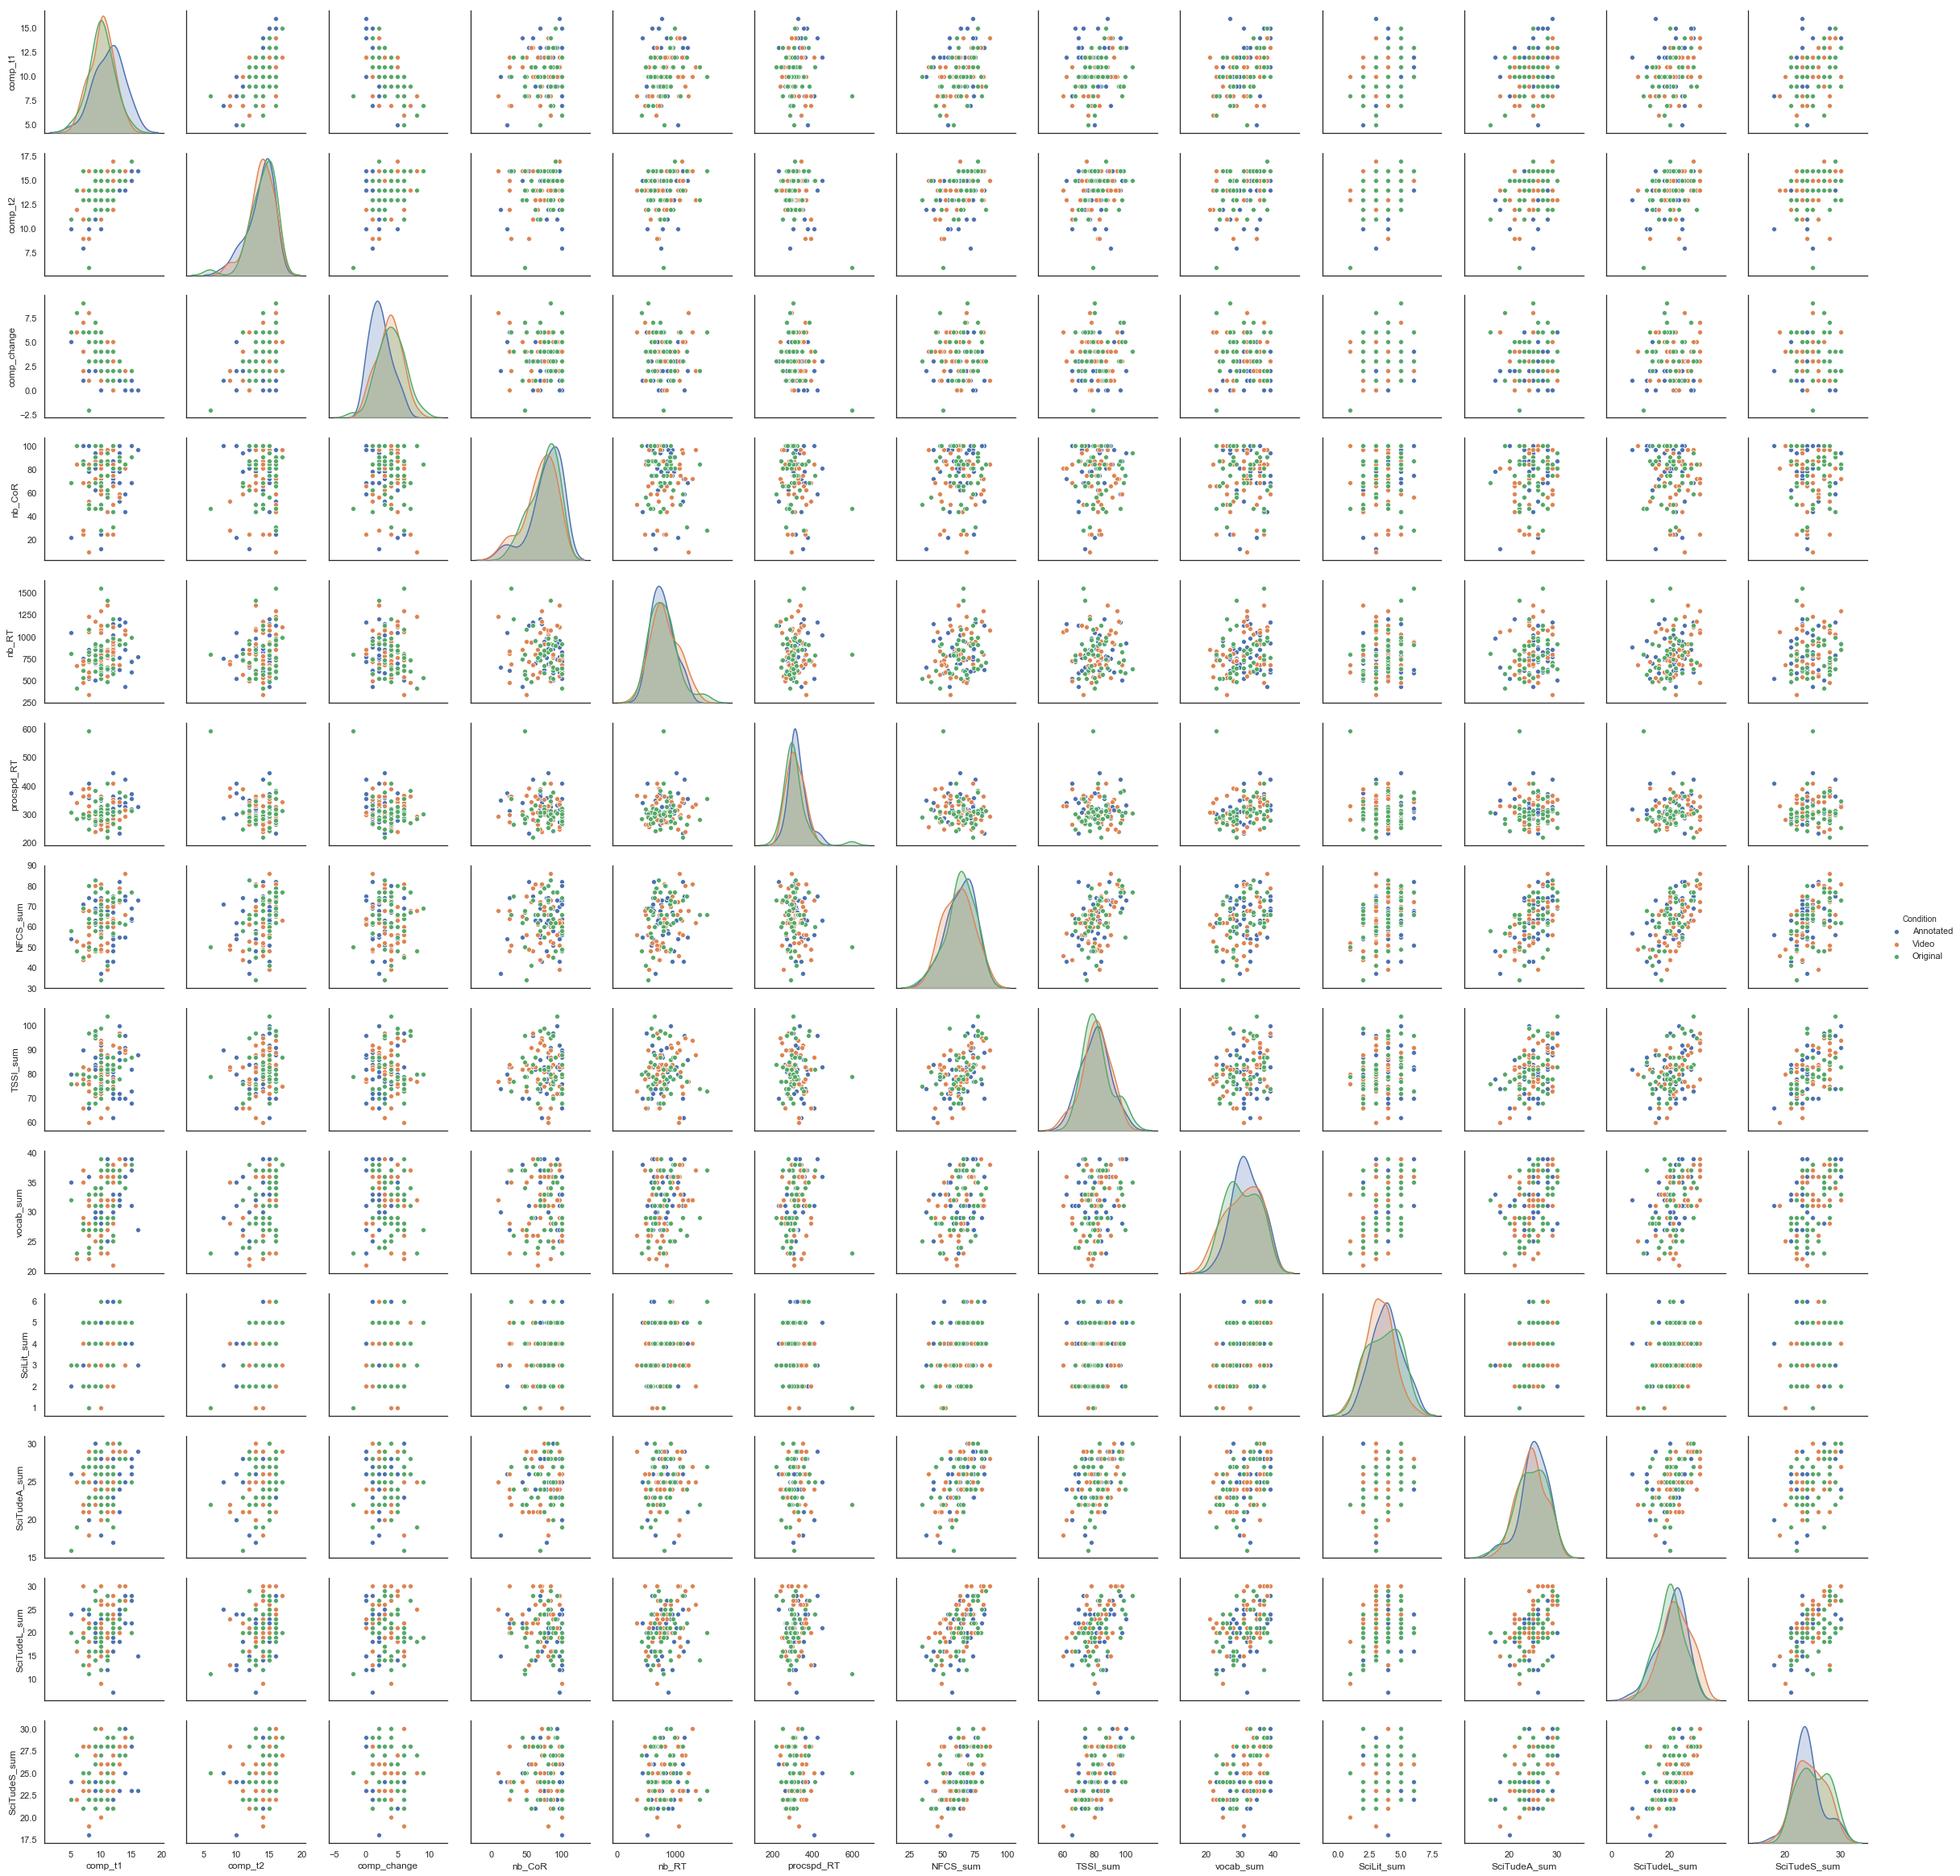

In [32]:
fpath = Path('..') / '..' / 'derivatives' / 'figures' / 'Condition_correlogram.png'
plt.figure(figsize=(16,5))
df = slim_data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='Condition')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath, bbox_inches='tight')

# Vertical Bar plots

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


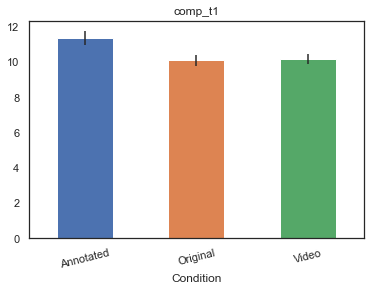

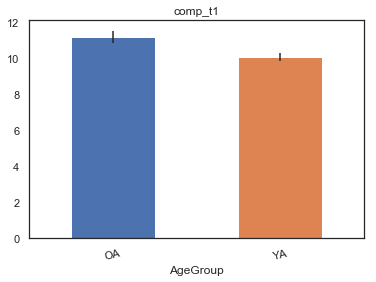

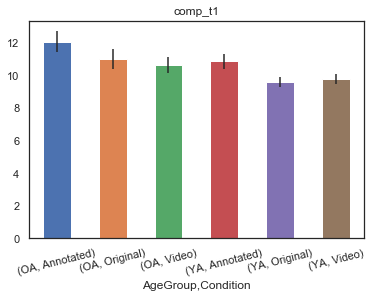

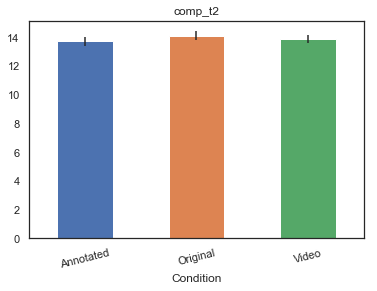

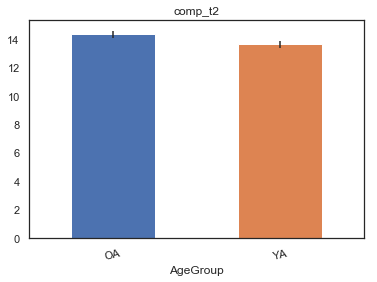

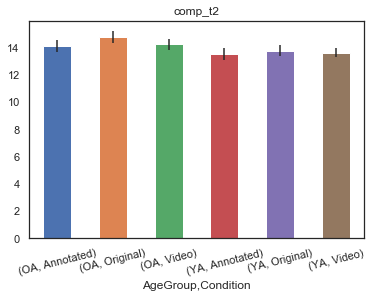

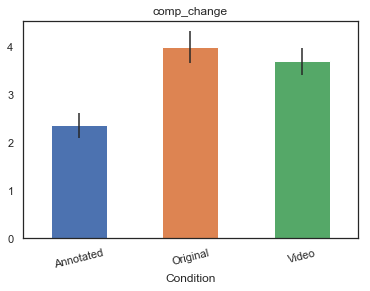

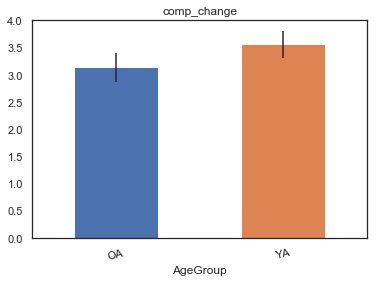

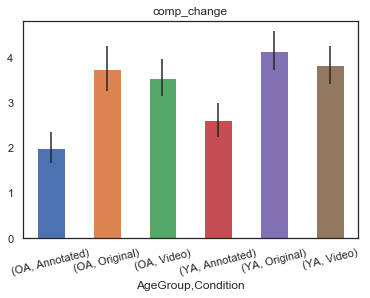

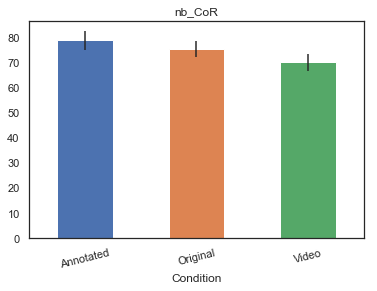

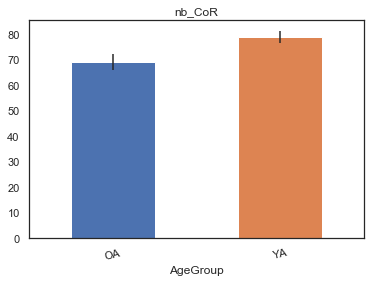

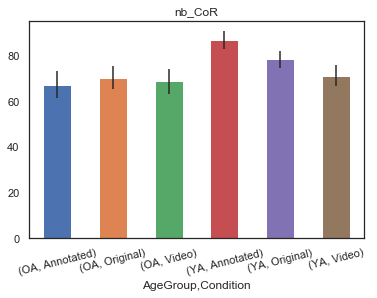

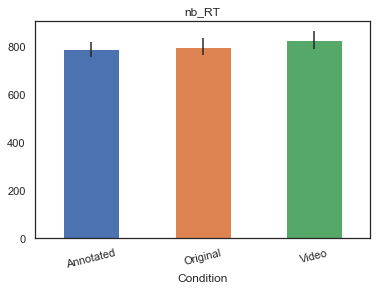

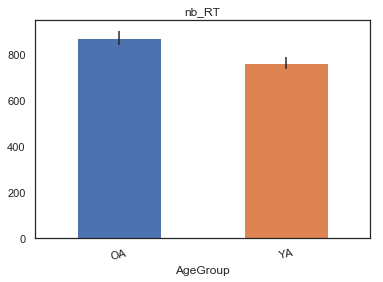

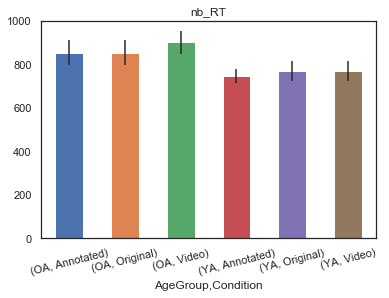

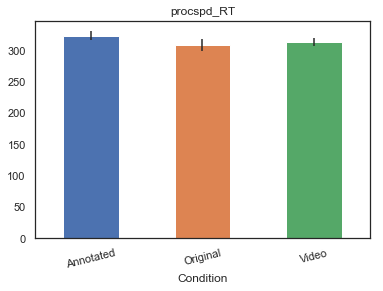

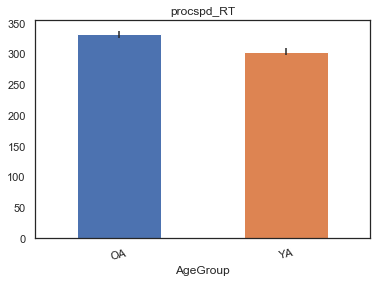

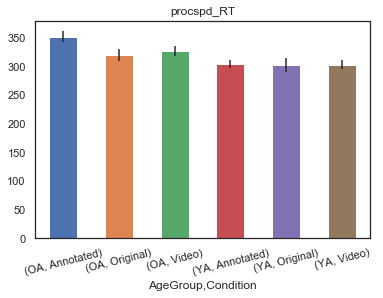

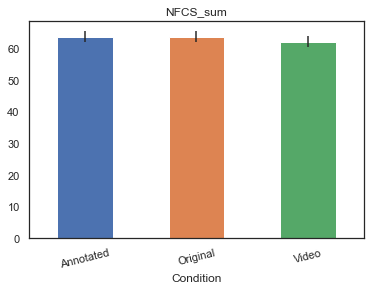

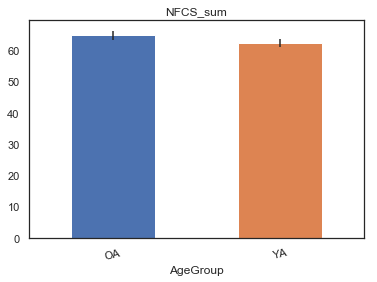

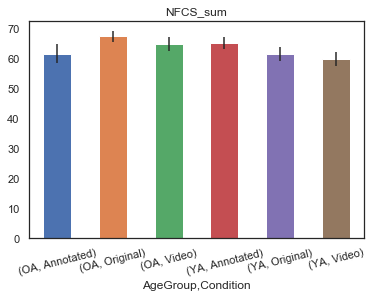

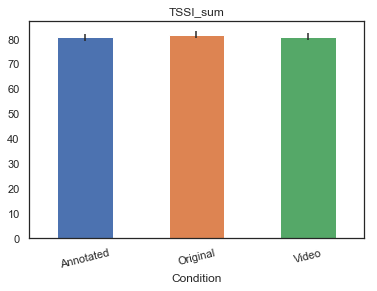

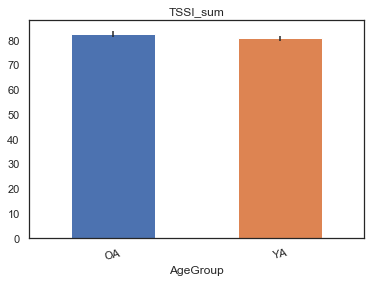

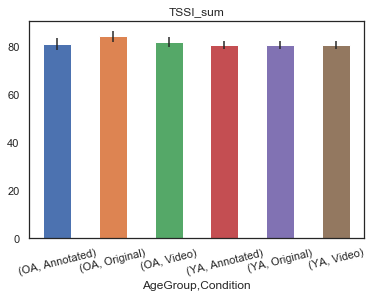

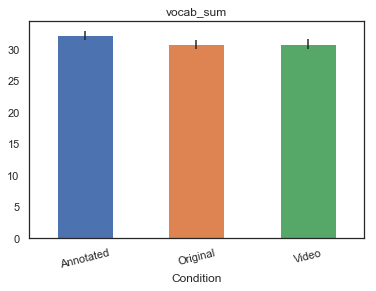

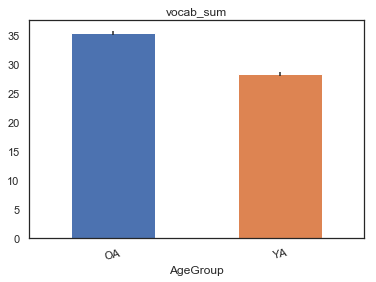

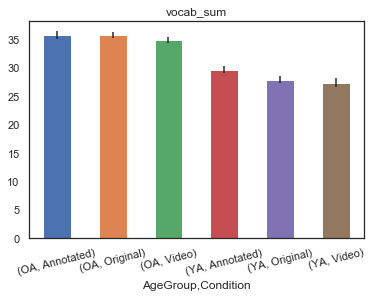

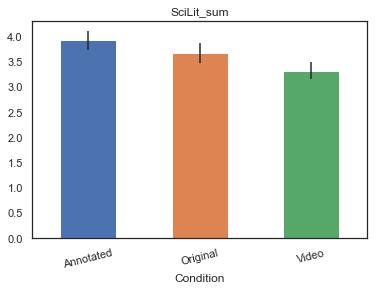

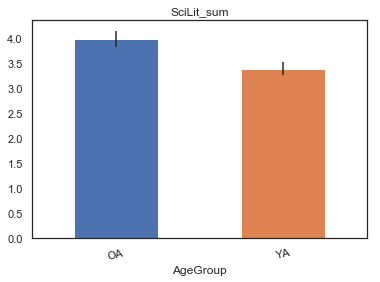

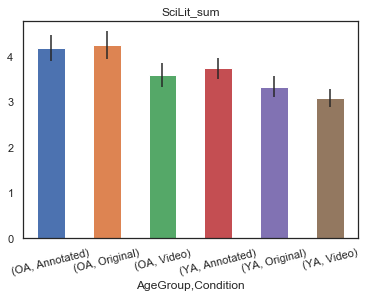

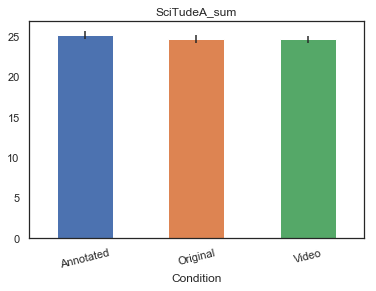

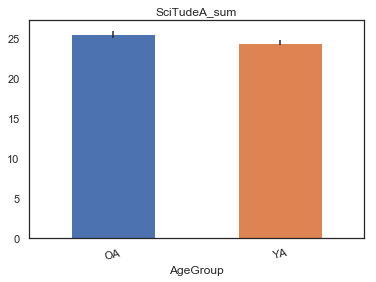

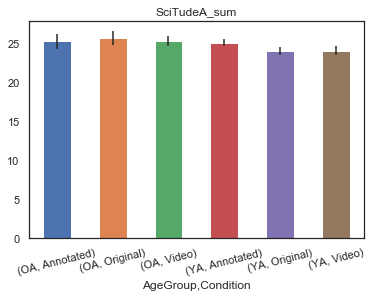

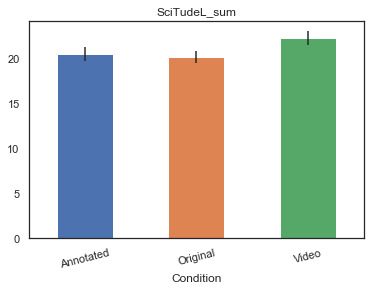

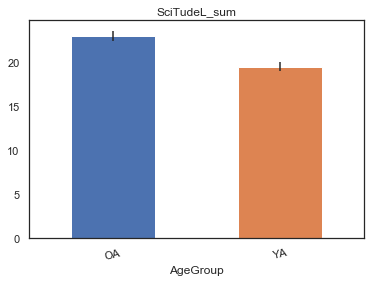

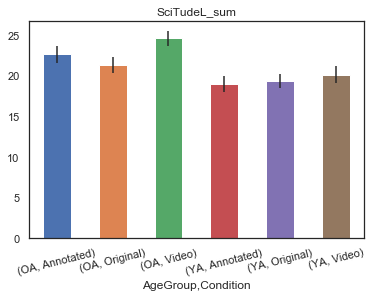

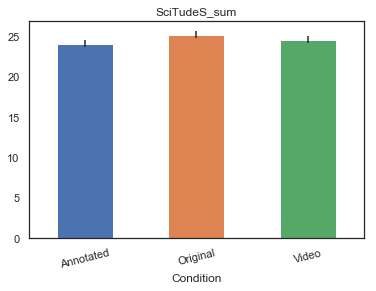

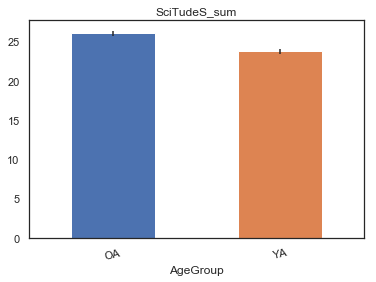

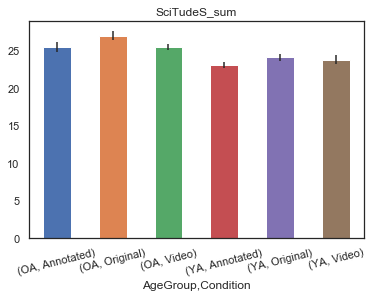

In [33]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = Path('..') / '..' / 'derivatives' / 'figures' / (var+'_'+''.join(grp)+'.png')
        means = slim_data.groupby(grp).mean()
        sem = slim_data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath, bbox_inches='tight')

# Horizontal Swarm, Strip, Box, Bar plots

..\..\derivatives\figures\comp_t1_Condition_swarm
..\..\derivatives\figures\comp_t2_Condition_swarm
..\..\derivatives\figures\comp_change_Condition_swarm
..\..\derivatives\figures\nb_CoR_Condition_swarm
..\..\derivatives\figures\nb_RT_Condition_swarm
..\..\derivatives\figures\procspd_RT_Condition_swarm
..\..\derivatives\figures\NFCS_sum_Condition_swarm
..\..\derivatives\figures\TSSI_sum_Condition_swarm
..\..\derivatives\figures\vocab_sum_Condition_swarm
..\..\derivatives\figures\SciLit_sum_Condition_swarm
..\..\derivatives\figures\SciTudeA_sum_Condition_swarm
..\..\derivatives\figures\SciTudeL_sum_Condition_swarm
..\..\derivatives\figures\SciTudeS_sum_Condition_swarm
..\..\derivatives\figures\comp_t1_AgeGroup_swarm
..\..\derivatives\figures\comp_t2_AgeGroup_swarm
..\..\derivatives\figures\comp_change_AgeGroup_swarm
..\..\derivatives\figures\nb_CoR_AgeGroup_swarm
..\..\derivatives\figures\nb_RT_AgeGroup_swarm
..\..\derivatives\figures\procspd_RT_AgeGroup_swarm
..\..\derivatives\figures\

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


..\..\derivatives\figures\comp_t2_Condition_bar
..\..\derivatives\figures\comp_change_Condition_bar
..\..\derivatives\figures\nb_CoR_Condition_bar
..\..\derivatives\figures\nb_RT_Condition_bar
..\..\derivatives\figures\procspd_RT_Condition_bar
..\..\derivatives\figures\NFCS_sum_Condition_bar
..\..\derivatives\figures\TSSI_sum_Condition_bar
..\..\derivatives\figures\vocab_sum_Condition_bar
..\..\derivatives\figures\SciLit_sum_Condition_bar
..\..\derivatives\figures\SciTudeA_sum_Condition_bar
..\..\derivatives\figures\SciTudeL_sum_Condition_bar
..\..\derivatives\figures\SciTudeS_sum_Condition_bar
..\..\derivatives\figures\comp_t1_AgeGroup_bar
..\..\derivatives\figures\comp_t2_AgeGroup_bar
..\..\derivatives\figures\comp_change_AgeGroup_bar
..\..\derivatives\figures\nb_CoR_AgeGroup_bar
..\..\derivatives\figures\nb_RT_AgeGroup_bar
..\..\derivatives\figures\procspd_RT_AgeGroup_bar
..\..\derivatives\figures\NFCS_sum_AgeGroup_bar
..\..\derivatives\figures\TSSI_sum_AgeGroup_bar
..\..\derivative

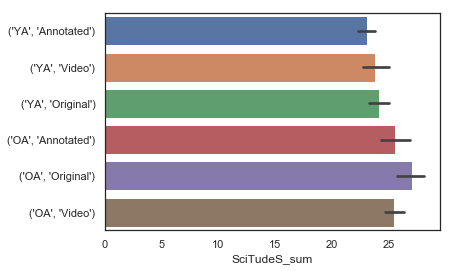

In [35]:
plots_dict = {'swarm':sns.swarmplot,
              'strip':sns.stripplot,
              'box':sns.boxplot,
              'bar':sns.barplot}

for plot in plots_dict.keys():
    for grp in grps_of_interest:
        for var in vars_of_interest:
            try: fig.clear()
            except AttributeError as e: fig=None
            
            fname = var+'_'+''.join(grp)+'_'+plot
            fpath = Path('..') / '..' / 'derivatives' / 'figures' / fname
            print(fpath)
            
            df = slim_data.set_index(grp)
            fig = plots_dict[plot](x=var, y=df.index, data=df)
            fig.get_figure().savefig(fpath, bbox_inches='tight')